1. Define an ETL pipeline. In your own words, explain the purpose of each component: Extract, Transform, and Load.

The purpose of the extract transform and load,is to clean out the data, 

the extract is used to gather information from the data, to be able to display it and know what needs to be done to it

the transform is to see if there are entries that need to be droppped, 

columns that are unecessarry to the data, or the column values that will hinder

in making it a better data to gather information that is to be needed

the load is used to save the transformed or cleaned data to be used in other necessasry activities

it is also used so that the data can be used in future times

without the need of cleaning or fixing it again

2.  Define an ETL pipeline. In your own words, explain the purpose of each component: Extract, Transform, and Load.

The purpose of the extract transform and load,is to clean out the data, 

the extract is used to gather information from the data, to be able to display it and know what needs to be done to it

the transform is to see if there are entries that need to be droppped, 

columns that are unecessarry to the data, or the column values that will hinder

in making it a better data to gather information that is to be needed

the load is used to save the transformed or cleaned data to be used in other necessasry activities

it is also used so that the data can be used in future times

without the need of cleaning or fixing it again

3.Identify at least two potential data quality issues

that might be present in the provided fake data.

Two issues that might be present is that

1. The data is redundant, an entry that is not needed

or just hindrance to using the data

making it more difficult to use

2. The data is not complete

it contains rows that are not complete

rows that are duplicates from it

or information that is unnesesarry to it

In [1]:
import pandas as pd

cust = pd.read_json('customers_data.json')

cust

,CustomerID,Name,JoinDate
0,C001,Alice,2022-12-01
1,C002,Bob,2022-11-15
2,C003,Charlie,2023-01-05
3,C004,Diana,2023-01-10
4,C005,Evan,2023-01-20


In [2]:
sales = pd.read_csv('sales_data_raw.csv')

sales

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount
0,T001,C001,2023-01-01,Widget,2,10,0.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10
2,T003,C003,2023-01-07,Widget,3,10,0.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05
4,T005,C001,2023-01-12,Widget,1,10,0.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20
6,T007,C005,2023-01-18,Widget,4,10,0.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10
8,T009,C003,2023-01-22,Widget,5,10,0.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15


In [3]:
# 4. How would you transform the TransactionDate in the sales data
# and the JoinDate in the customer data into proper datetime objects using Pandas?

# pandas has a command named 'to_datetime()' 
# using this command the entries in a column chosen will be converted
# to a datetime format, the entries must be in a datetime format or it would be an error.

#the code below changes the column of the 'JoinDate' column with a new datatype
cust['JoinDate'] = pd.to_datetime(cust['JoinDate']) 
cust.dtypes # this is used to display the data type of the table

CustomerID            object
Name                  object
JoinDate      datetime64[ns]
dtype: object

In [4]:
# the same process is done here
sales['TransactionDate'] = pd.to_datetime(sales['TransactionDate'])
sales.dtypes # this is used to display the data type of the table

TransactionID              object
CustomerID                 object
TransactionDate    datetime64[ns]
Product                    object
Quantity                    int64
Price                       int64
Discount                  float64
dtype: object

In [5]:
# 5. Final Transaction Amount = (Quantity × Price) × (1 – Discount)
# Write a function to calculate the final transaction
#amount given the columns Quantity, Price, and Discount.

#start by creating a function that takes the required number of values
# qty = Quantity
# prc = Price
#disc = discount
def fta(qty, prc, disc):
    # place the required value and form the equation to get
    # the "Final_Transaction_Amount"
    p = (qty * prc) * (1 - disc)
    #return the value to be placed
    return p
# call the function and use the needed values
#the values are: sales.Quantity, sales.Price,sales.Discount
b = fta(sales.Quantity, sales.Price,sales.Discount)
# create a new column the will be the placement of the results
sales['Final_Transaction_Amount'] = b
#call the table by typing its name
sales

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Final_Transaction_Amount
0,T001,C001,2023-01-01,Widget,2,10,0.00,20.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10,18.00
2,T003,C003,2023-01-07,Widget,3,10,0.00,30.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,71.25
4,T005,C001,2023-01-12,Widget,1,10,0.00,10.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20,32.00
6,T007,C005,2023-01-18,Widget,4,10,0.00,40.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10,40.50
8,T009,C003,2023-01-22,Widget,5,10,0.00,50.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15,51.00


In [6]:
#this part is checking the datatypes of the columns
#along with the one made
sales.dtypes

TransactionID                       object
CustomerID                          object
TransactionDate             datetime64[ns]
Product                             object
Quantity                             int64
Price                                int64
Discount                           float64
Final_Transaction_Amount           float64
dtype: object

In [7]:
# 6.Explain how you would join the sales data
#with the customer data.
#Which column is the appropriate key to use?

#first is checking what column does the two datasets have a similar name
print(cust.columns)
print(sales.columns)

Index(['CustomerID', 'Name', 'JoinDate'], dtype='object')
Index(['TransactionID', 'CustomerID', 'TransactionDate', 'Product', 'Quantity',
       'Price', 'Discount', 'Final_Transaction_Amount'],
      dtype='object')


In [8]:
# both have a 'CustomerID' column
#that column would be used to merge the two datas
#merge() could be used to combine two datas
#using sales as the first data, to be joined the the customer data
# the 'on='CustomerID'' is used to know what column would be use
# as reference to combine the two data
comb = sales.merge(cust, on='CustomerID')
comb

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Final_Transaction_Amount,Name,JoinDate
0,T001,C001,2023-01-01,Widget,2,10,0.00,20.00,Alice,2022-12-01
1,T002,C002,2023-01-05,Gadget,1,20,0.10,18.00,Bob,2022-11-15
2,T003,C003,2023-01-07,Widget,3,10,0.00,30.00,Charlie,2023-01-05
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,71.25,Bob,2022-11-15
4,T005,C001,2023-01-12,Widget,1,10,0.00,10.00,Alice,2022-12-01
5,T006,C004,2023-01-15,Gadget,2,20,0.20,32.00,Diana,2023-01-10
6,T007,C005,2023-01-18,Widget,4,10,0.00,40.00,Evan,2023-01-20
7,T008,C002,2023-01-20,Gizmo,3,15,0.10,40.50,Bob,2022-11-15
8,T009,C003,2023-01-22,Widget,5,10,0.00,50.00,Charlie,2023-01-05
9,T010,C005,2023-01-25,Gadget,3,20,0.15,51.00,Evan,2023-01-20


In [21]:
comb.dtypes

TransactionID                       object
CustomerID                          object
TransactionDate             datetime64[ns]
Product                             object
Quantity                             int64
Price                                int64
Discount                           float64
Final_Transaction_Amount           float64
Name                                object
JoinDate                    datetime64[ns]
dtype: object

In [24]:
#7. What method in Pandas would you use to identify
# and remove duplicate rows in the sales data?

#first is you select a column that has duplicate entries
# which is the 'CustomerID' column
# you would use that column to drop the duplicates in it
# the 'drop_duplicates()' command is used to drop the dulicate rows
#by putting the name of the column inside the parenthesis the
#duplicates in the column will be dropped
sales.drop_duplicates('CustomerID')

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Final_Transaction_Amount
0,T001,C001,2023-01-01,Widget,2,10,0.0,20.0
1,T002,C002,2023-01-05,Gadget,1,20,0.1,18.0
2,T003,C003,2023-01-07,Widget,3,10,0.0,30.0
5,T006,C004,2023-01-15,Gadget,2,20,0.2,32.0
6,T007,C005,2023-01-18,Widget,4,10,0.0,40.0


In [27]:
# 8. After transforming the data,
# list two different methods you might use to 
# load the data into a target system, 
# including any relevant libraries or functions.

#after tranforming the data you load by either
#calling the dataframe to display it
# or saving it to a csv file
# this two methods use the pandas library

#calling the dataframe by typing its name
#from the previous questions
# the 'comb' dataframe is the combination of the two data
#by typing 'comb' the dataframe could be displayed

comb

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Final_Transaction_Amount,Name,JoinDate
0,T001,C001,2023-01-01,Widget,2,10,0.00,20.00,Alice,2022-12-01
1,T002,C002,2023-01-05,Gadget,1,20,0.10,18.00,Bob,2022-11-15
2,T003,C003,2023-01-07,Widget,3,10,0.00,30.00,Charlie,2023-01-05
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,71.25,Bob,2022-11-15
4,T005,C001,2023-01-12,Widget,1,10,0.00,10.00,Alice,2022-12-01
5,T006,C004,2023-01-15,Gadget,2,20,0.20,32.00,Diana,2023-01-10
6,T007,C005,2023-01-18,Widget,4,10,0.00,40.00,Evan,2023-01-20
7,T008,C002,2023-01-20,Gizmo,3,15,0.10,40.50,Bob,2022-11-15
8,T009,C003,2023-01-22,Widget,5,10,0.00,50.00,Charlie,2023-01-05
9,T010,C005,2023-01-25,Gadget,3,20,0.15,51.00,Evan,2023-01-20


In [28]:
# to save the dataframe to csv
# you would use the function to_csv()

comb.to_csv('combination.csv')

In [29]:
# 9. Are there other transformations that are necessary to
#perform on the dataset that were not included so far? 
# List down and perform.

#one is dropping the null values
#using the sales data and the customer data
# the dropna() command is used to
#drop null values in the data
sales.dropna()

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Final_Transaction_Amount
0,T001,C001,2023-01-01,Widget,2,10,0.00,20.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10,18.00
2,T003,C003,2023-01-07,Widget,3,10,0.00,30.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,71.25
4,T005,C001,2023-01-12,Widget,1,10,0.00,10.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20,32.00
6,T007,C005,2023-01-18,Widget,4,10,0.00,40.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10,40.50
8,T009,C003,2023-01-22,Widget,5,10,0.00,50.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15,51.00


In [30]:
# to the customer data
cust.dropna()

,CustomerID,Name,JoinDate
0,C001,Alice,2022-12-01
1,C002,Bob,2022-11-15
2,C003,Charlie,2023-01-05
3,C004,Diana,2023-01-10
4,C005,Evan,2023-01-20


In [31]:
#to check if the null values are droppped
# we can use the isnull().sum()

sales.isnull().sum()

TransactionID               0
CustomerID                  0
TransactionDate             0
Product                     0
Quantity                    0
Price                       0
Discount                    0
Final_Transaction_Amount    0
dtype: int64

In [32]:
cust.isnull().sum()

CustomerID    0
Name          0
JoinDate      0
dtype: int64

In [ ]:
#there are no null entries in the two datas

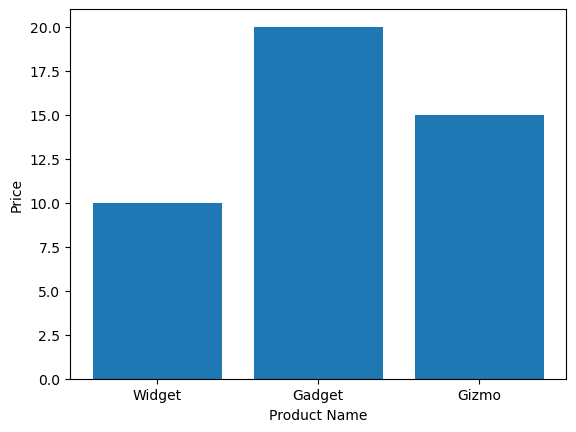

In [82]:
# 10. What are the visualizations necessary to extract
#insight from the dataset? Provide a list of these steps
#perform and derive the necessary insights.

import matplotlib.pyplot as plt # matplotlib is used to create visuals
a = comb.Name
b = comb.Quantity

# an insight to be made is the products sold and their price
# using this, we could know what product is most expensive and 
# the least expensive
plt.bar(comb.Product,comb.Price)
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.show()

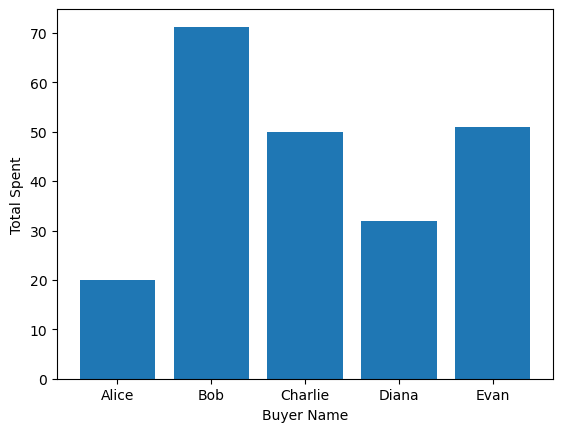

In [83]:
# another is making a bar graph on who has spent the most amount
# and the one who has mspent a least amount

plt.bar(comb.Name,comb.Final_Transaction_Amount)
plt.xlabel('Buyer Name')
plt.ylabel('Total Spent')
plt.show()